# DATA PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Master/MANB2153/csv_result-heart-statlog (1).csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## **DATA PREPROCESSING**

In [ ]:
from sklearn.preprocessing import LabelEncoder #for only 2 class (Yes or No)
le = LabelEncoder()
y = le.fit_transform(y)

## **KFOLD CROSS VALIDATION FOR ANN**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#keras.wrappers is use to implement the k-cross validation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
	
def create_baseline():
    # create model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(60, activation='relu'))
    model.add(tf.keras.layers.Dense(60, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5,     verbose=0)
kfold1 = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
kfold2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
kfold3 = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
results1 = cross_val_score(estimator, X, y, cv=kfold1)
results2 = cross_val_score(estimator, X, y, cv=kfold2)
results3 = cross_val_score(estimator, X, y, cv=kfold3)
print("Baseline: %.2f%% (%.2f%%)" % (results1.mean()*100, results1.std()*100))
print("Baseline: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))
print("Baseline: %.2f%% (%.2f%%)" % (results3.mean()*100, results3.std()*100))

Baseline: 81.11% (0.37%)
Baseline: 82.96% (2.46%)
Baseline: 78.89% (6.21%)


In [ ]:
#to obtain prediction value of y
from sklearn.model_selection import cross_val_predict
y_pred1 = cross_val_predict(estimator, X, y, cv=kfold1)
y_pred2 = cross_val_predict(estimator, X, y, cv=kfold2)
y_pred3 = cross_val_predict(estimator, X, y, cv=kfold3)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y, y_pred1)
print(cm1)
acc1 = accuracy_score(y, y_pred1)
print(acc1)

cm2 = confusion_matrix(y, y_pred2)
print(cm2)
acc2 = accuracy_score(y, y_pred2)
print(acc2)

cm3 = confusion_matrix(y, y_pred3)
print(cm3)
acc3 = accuracy_score(y, y_pred3)
print(acc3)

[[121  29]
 [ 30  90]]
0.7814814814814814
[[132  18]
 [ 32  88]]
0.8148148148148148
[[127  23]
 [ 28  92]]
0.8111111111111111


## **ANN TRAIN TEST VALIDATION**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Dense(units=60, activation='relu')) #rectifier activation function
model4.add(tf.keras.layers.Dense(units=60, activation='relu')) #rectifier activation function
model4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model4.fit(X_train, y_train, batch_size = 5, epochs =100)

Epoch 1/100
44/44 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.5918
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8133
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8514
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8884
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8702
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2492 - accuracy: 0.9090
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8692
Epoch 8/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8831
Epoch 9/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.8751
Epoch 10/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9146
Epoch 11/

In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = model4.predict(X_test)
y_pred4 = (y_pred4>0.5)
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
acc4 = accuracy_score(y_test, y_pred4)
print(acc4)

[[27  4]
 [ 6 17]]
0.8148148148148148


In [ ]:
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Dense(units=60, activation='relu')) #rectifier activation function
model5.add(tf.keras.layers.Dense(units=60, activation='relu')) #rectifier activation function
model5.add(tf.keras.layers.Dense(units=60, activation='relu')) #rectifier activation function
model5.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model5.fit(X_train, y_train, batch_size = 5, epochs =100)
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = model1.predict(X_test)
y_pred5 = (y_pred5>0.5)
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
acc5 = accuracy_score(y_test, y_pred5)
print(acc5)

Epoch 1/100
44/44 [==============================] - 1s 1ms/step - loss: 0.6041 - accuracy: 0.7374
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8754
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8328
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.9025
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8829
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.9161
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2062 - accuracy: 0.9132
Epoch 8/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2194 - accuracy: 0.9198
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9389
Epoch 10/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9174
Epoch 11/

In [ ]:
model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.Dense(units=60, activation='relu')) #rectifier activation function
model6.add(tf.keras.layers.Dense(units=60, activation='relu')) #rectifier activation function
model6.add(tf.keras.layers.Dense(units=60, activation='relu')) #rectifier activation function
model6.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model6.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model6.fit(X_train, y_train, batch_size = 5, epochs =100)
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6 = model1.predict(X_test)
y_pred6 = (y_pred5>0.5)
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
acc6 = accuracy_score(y_test, y_pred6)
print(acc6)

Epoch 1/100
44/44 [==============================] - 1s 1ms/step - loss: 0.6292 - accuracy: 0.6230
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8398
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8600
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8948
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.8810
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8716
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9374
Epoch 8/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2180 - accuracy: 0.9263
Epoch 9/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9119
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9564
Epoch 11/

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs1 = model4.predict_proba(X_test)
probs2 = model5.predict_proba(X_test)
probs3 = model6.predict_proba(X_test)

probs1

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[4.2442110e-07],
       [9.9979293e-01],
       [6.5431965e-11],
       [9.9991983e-01],
       [9.9999678e-01],
       [1.3892651e-03],
       [9.9982774e-01],
       [1.6867000e-01],
       [1.1574328e-03],
       [1.0000000e+00],
       [9.9992514e-01],
       [9.9998164e-01],
       [1.0000000e+00],
       [1.0492715e-05],
       [1.1247098e-03],
       [1.0000000e+00],
       [1.5010834e-03],
       [9.9649620e-01],
       [1.2129331e-01],
       [1.4584308e-08],
       [9.7204930e-01],
       [1.3944423e-06],
       [3.5989285e-04],
       [6.8407358e-06],
       [2.7871132e-04],
       [3.2696128e-04],
       [4.5986623e-02],
       [3.6648919e-07],
       [2.6583374e-03],
       [9.9760830e-01],
       [2.0393133e-03],
       [5.3808785e-06],
       [7.0241070e-01],
       [1.0000000e+00],
       [9.1558194e-01],
       [3.0205870e-01],
       [5.9709642e-09],
       [1.4268451e-06],
       [3.3599138e-04],
       [8.4258115e-01],
       [5.2174926e-04],
       [2.524280

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


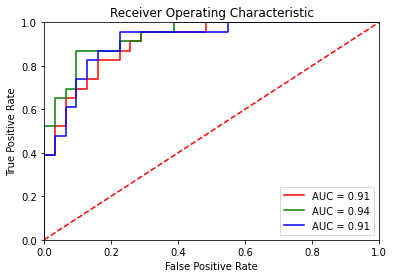

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs1 = model4.predict_proba(X_test)
probs2 = model5.predict_proba(X_test)
probs3 = model6.predict_proba(X_test)
preds1 = probs1[:,:]
preds2 = probs2[:,:]
preds3 = probs3[:,:]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds3)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'r', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Test the model
#Define input

a=271  #ID
b=30   #age
c=1    #sex
d=4    #chest
e=160  #resting_blood_pressure
f=286  #serum_cholestoral
g=5    #fasting_blood_sugar
h=2    #resting_electrocardiographic_results
i=108  #maximum_heart_rate_achieved
j=1    #exercise_induced_angina
k=1.5  #oldpeak
l=2    #slope
m=3    #number_of_major_vessels
n=3    #thal

new_input = [[a,b,c,d,e,f,g,h,i,j,k,l,m,n]]
X_new = sc.transform(new_input)
y_new = model.predict(X_new)
print(y_new)
if y_new==1:
    print('Potential Heart Disease Patient')
else:
    print('Healthy Patient')

[[1.]]
Potential Heart Disease Patient
